# Лабораторная работа 2

## Полносвязная нейронная сеть
6409, Зубов Егор

Реализовать нейронную сеть, состоящую из двух полносвязных слоев и решающую задачу классификации на наборе данных из лабораторной работы 1.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from scripts.classifiers.neural_net import TwoLayerNet
from scripts.data_utils import load_CIFAR10

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

1. Добавьте реализации методов класса TwoLayerNet . Проверьте вашу реализацию на модельных данных (Код приведен ниже).  

In [25]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Прямой проход: вычисление выхода сети

Реализуйте первую часть  метода TwoLayerNet.loss, вычисляющую оценки классов для входных данных. 

Сравните ваш выход сети с эталонными значениями. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-7) .

In [26]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()


print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08



# Прямой проход: вычисление loss

Реализуйте вторую часть метода, вычисляющую значение функции потерь. Сравните с эталоном. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-12) .

In [27]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.018965419606062905


# Обратный проход

Реализуйте третью часть метода loss. Используйте численную реализацию расчета градиента для проверки вашей реализации обратного прохода.  Если прямой и обратный проходы реализованы верно, то ошибка будет < 1e-8 для каждой из переменных W1, W2, b1, и b2. 


In [28]:
from scripts.gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.05)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 8.002490e-01
W2 max relative error: 3.333333e-01
b1 max relative error: 2.738421e-09
b2 max relative error: 3.865070e-11


# Обучение нейронной сети на смоделированных данных

Реализуйте методы TwoLayerNet.train и TwoLayerNet.predict. Обучайте сеть до тех пор, пока значение loss не будет < 0.02.


Final training loss:  0.01714416569445265


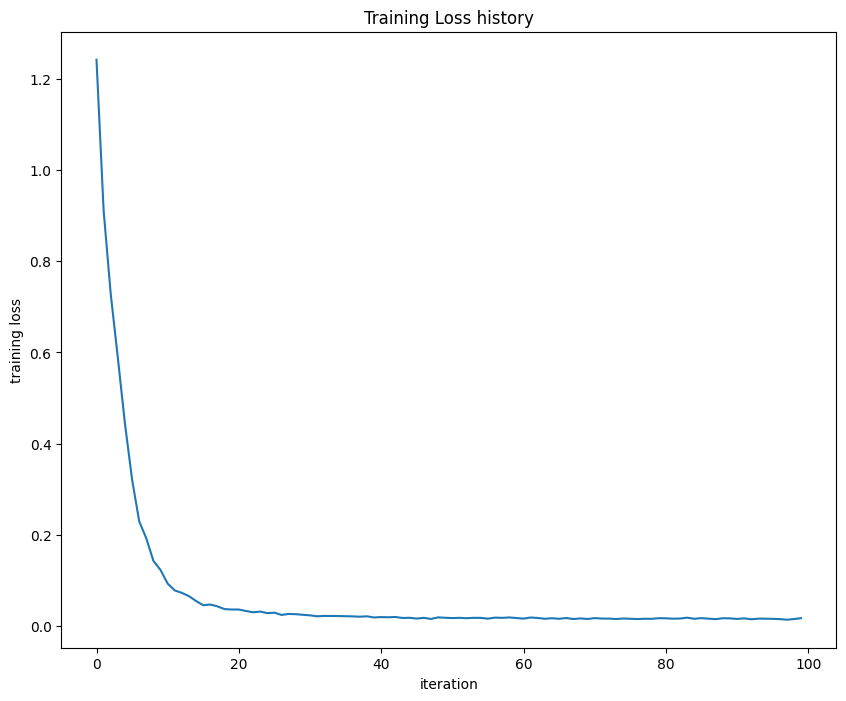

In [29]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])


plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Обучение нейронной сети на реальном наборе данных (CIFAR-10, MNIST)

Загрузите набор данных, соответствующий вашему варианту. 

Разделите данные на обучающую, тестовую и валидационную выборки.

Выполните предобработку данных, как в ЛР 1. 

Обучите нейронную сеть на ваших данных. 

При сдаче лабораторной работы объясните значения всех параметров метода train.

In [30]:
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
X_val = X_train[49000:50000]
y_val = y_train[49000:50000]

X_train = X_train[0:49000]
y_train = y_train[0:49000]

X_dev = X_test[9000:10000]
y_dev = y_test[9000:10000]

X_test = X_test[0:9000]
y_test = y_test[0:9000]

X_train = np.reshape(X_train, (X_train.shape[0], -1))
y_train = np.reshape(y_train, (y_train.shape[0],))

X_val = np.reshape(X_val, (X_val.shape[0], -1))
y_val = np.reshape(y_val, (y_val.shape[0],))

X_test = np.reshape(X_test, (X_test.shape[0], -1))
y_test = np.reshape(y_test, (y_test.shape[0],))

X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
y_dev = np.reshape(y_dev, (y_dev.shape[0],))

print(f'X_train: {X_train.shape}\nX_val: {X_val.shape}\nX_test: {X_test.shape}\nX_dev: {X_dev.shape}')

Clear previously loaded data.
scripts/datasets/cifar-10-batches-py\data_batch_1
scripts/datasets/cifar-10-batches-py\data_batch_2
scripts/datasets/cifar-10-batches-py\data_batch_3
scripts/datasets/cifar-10-batches-py\data_batch_4
scripts/datasets/cifar-10-batches-py\data_batch_5
X_train: (49000, 3072)
X_val: (1000, 3072)
X_test: (9000, 3072)
X_dev: (1000, 3072)


In [31]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302774
iteration 100 / 1000: loss 2.300645
iteration 200 / 1000: loss 2.255981
iteration 300 / 1000: loss 2.121331
iteration 400 / 1000: loss 2.092065
iteration 500 / 1000: loss 2.030681
iteration 600 / 1000: loss 2.033523
iteration 700 / 1000: loss 1.923733
iteration 800 / 1000: loss 1.951921
iteration 900 / 1000: loss 1.896307
Validation accuracy:  0.309


## Параметры по умолчанию

In [38]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 100: loss 2.302564
Validation accuracy:  0.12


## Увеличим количество эпох и параметр регуляризации, уменьшим размер батча

In [41]:
input_size = 32 * 32 * 3

hidden_size = 50
num_classes = 10

net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=5000, batch_size=100,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.8, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 5000: loss 2.303287
iteration 100 / 5000: loss 2.302462
iteration 200 / 5000: loss 2.245260
iteration 300 / 5000: loss 2.180145
iteration 400 / 5000: loss 2.158576
iteration 500 / 5000: loss 2.060254
iteration 600 / 5000: loss 1.952009
iteration 700 / 5000: loss 1.986521
iteration 800 / 5000: loss 1.903835
iteration 900 / 5000: loss 1.919030
iteration 1000 / 5000: loss 1.908306
iteration 1100 / 5000: loss 1.954697
iteration 1200 / 5000: loss 1.960776
iteration 1300 / 5000: loss 1.937825
iteration 1400 / 5000: loss 1.923258
iteration 1500 / 5000: loss 2.033245
iteration 1600 / 5000: loss 1.906941
iteration 1700 / 5000: loss 1.878953
iteration 1800 / 5000: loss 1.879344
iteration 1900 / 5000: loss 1.710158
iteration 2000 / 5000: loss 1.692209
iteration 2100 / 5000: loss 1.890927
iteration 2200 / 5000: loss 1.749283
iteration 2300 / 5000: loss 1.771598
iteration 2400 / 5000: loss 1.892163
iteration 2500 / 5000: loss 1.843197
iteration 2600 / 5000: loss 1.707504
iteration 270

Используя параметры по умолчанию, вы можете получить accuracy, примерно равный 0.29. 

Проведите настройку гиперпараметров для увеличения accuracy. Поэкспериментируйте со значениями гиперпараметров, например, с количеством скрытых слоев, количеством эпох, скорости обучения и др. Ваша цель - максимально увеличить accuracy полносвязной сети на валидационном наборе. Различные эксперименты приветствуются. Например, вы можете использовать методы для сокращения размерности признакового пространства (например, PCA), добавить dropout слои и др. 

Для лучшей модели вычислите acсuracy на тестовом наборе. 

Для отладки процесса обучения часто помогают графики изменения loss и accuracy в процессе обучения. Ниже приведен код построения таких графиков. 

[0.093, 0.222, 0.317, 0.353, 0.365, 0.386, 0.4, 0.398, 0.398, 0.418, 0.41]


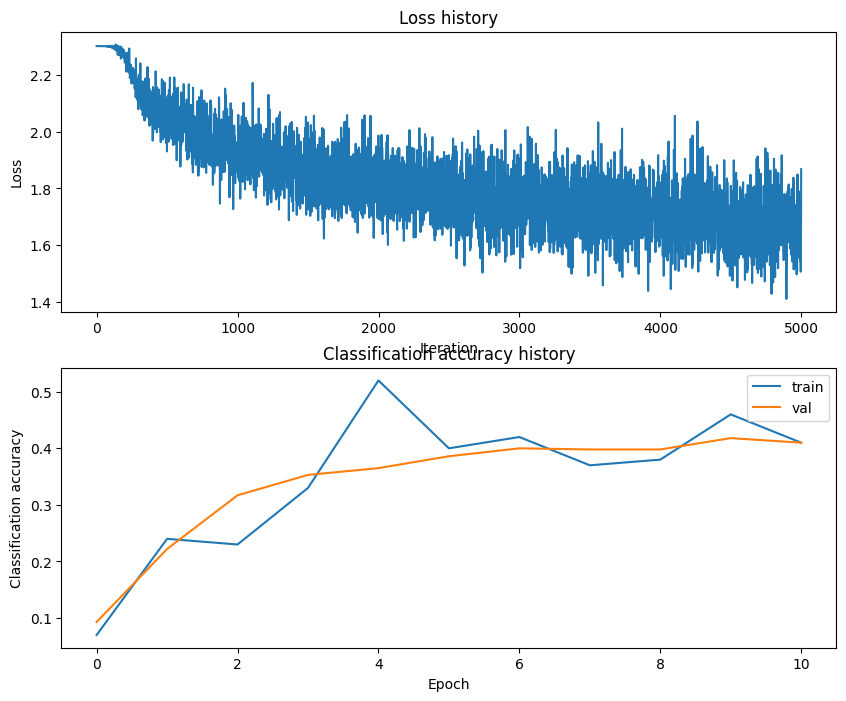

In [42]:
print(stats['val_acc_history'])
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

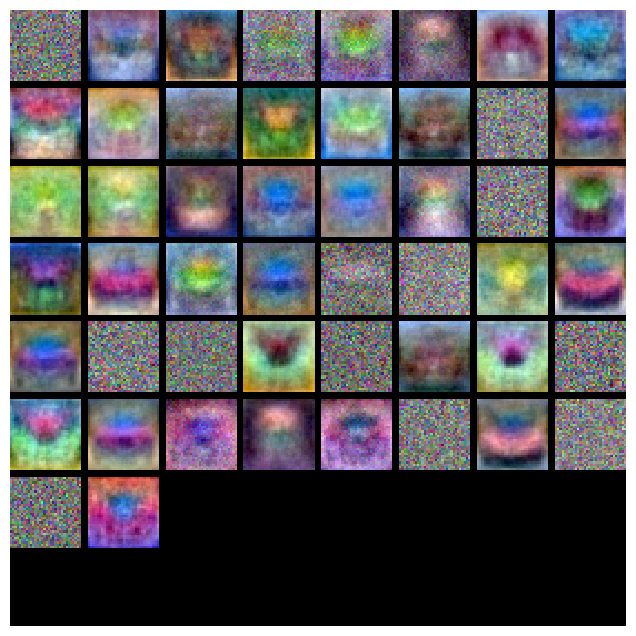

In [43]:
from scripts.vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

Сделайте выводы по результатам работы. 

Наибольшая точность была достигнута при:
- увеличении количества эпох
- увеличении параметра регуляризации
- уменьшении размера батча